In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

We will create a simple linear relationship between the independent variable $x$ and the dependent (output) variable $y$

In [2]:
x = np.linspace(0,20,21)
y = 2*x + np.random.default_rng(12345).normal(0,4,len(x))

[Text(0.5, 0, 'x, input'), Text(0, 0.5, 'y, output')]

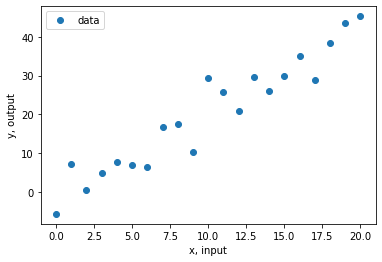

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,y,'o',label='data');
ax.legend()
ax.set(xlabel='x, input',ylabel='y, output')

Now we fit a line ($ax + b$) to this data:

In [4]:
from scipy.optimize import curve_fit

In [5]:
def linear_model(x, a, b):
    return a * x + b

(a,b), _ = curve_fit(linear_model, x, y)
print('Optimal parameters: a={:.2f}, b={:.2f}'.format(a,b))

Optimal parameters: a=2.24, b=-2.18


[Text(0.5, 0, 'x, input'), Text(0, 0.5, 'y, output')]

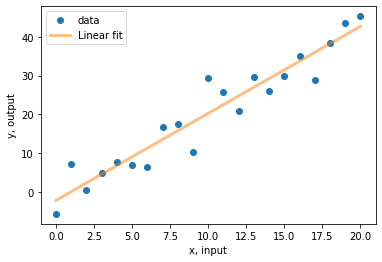

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,y,'o',label='data');
_x = np.linspace(0,20,100)
ax.plot(_x,linear_model(_x,a,b),linewidth=3,alpha=0.5,label='Linear fit')
ax.legend()
ax.set(xlabel='x, input',ylabel='y, output')

asdf

In [7]:
import torch
import torch.nn as nn
from torch.optim import Adam

torch.__version__

C:\Users\kbrendlinger\miniconda3\envs\torch_pyg\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.12.0+cpu'

In [8]:
class SimpleLinearNetwork(nn.Module):
    """
    A simple torch Neural Network reproducing a linear model ("ax+b")
    """

    def __init__(self, input_dim, output_dim):
        super(SimpleLinearNetwork, self).__init__()

        # simple ANN with a single layer
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, X):
        # forward pass
        X = self.linear(X)
        return X

In [9]:
model = SimpleLinearNetwork(1,1)
optimizer = Adam(model.parameters(), lr=0.03)
loss_function = torch.nn.MSELoss()

In [10]:
for i in model.named_parameters() :
    print(i)

a_nn = model.linear.weight.tolist()[0][0]
b_nn = model.linear.bias.tolist()[0]

print('Network a (untrained):',a_nn)
print('Network b (untrained):',b_nn)

('linear.weight', Parameter containing:
tensor([[0.1598]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([-0.3930], requires_grad=True))
Network a (untrained): 0.15976691246032715
Network b (untrained): -0.3930143117904663


(0.0, 1.0, 0.0, 1.0)

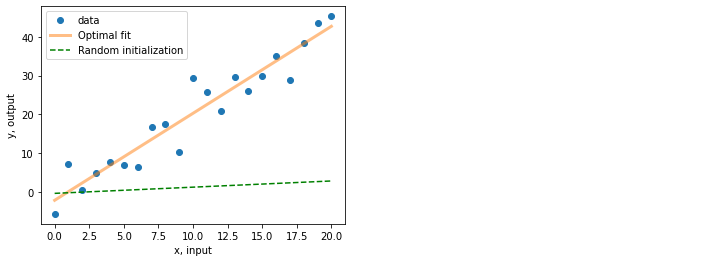

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.plot(x,y,'o',label='data');
_x = np.linspace(0,20,100)
_X = torch.tensor(_x.reshape(100,1)).float()

ax.plot(_x,linear_model(_x,a,b),linewidth=3,alpha=0.5,label='Optimal fit')

random_init = model(_X).detach().numpy()
ax.plot(_x,random_init,color='green',linestyle='dashed',label='Random initialization')
ax.legend(prop={'size': 10})
ax.set(xlabel='x, input',ylabel='y, output')

ax = axes[1]
ax.axis('off')

In [12]:
X = torch.tensor(x.reshape(21,1)).float()
Y = torch.tensor(y.reshape(21,1)).float()

losses = []

In [13]:
def train_n_epochs(n_epochs,losses_list) :

    losses_list = []
    
    for i in range(n_epochs) :

        # reset the gradient
        optimizer.zero_grad()

        # Ask the ANN to predict the output Y given the dataset's input X
        y_pred = model(X)

        # Calculate the total loss across the dataset
        loss = loss_function(y_pred, Y)

        # calculate the gradients using backpropagation
        loss.backward()
        losses.append(loss.item())

        # The optimizer updates the ANN parameters using the gradients
        optimizer.step()

    return

In [14]:
train_n_epochs(100,losses)
epochs_100 = model(_X).detach().numpy()

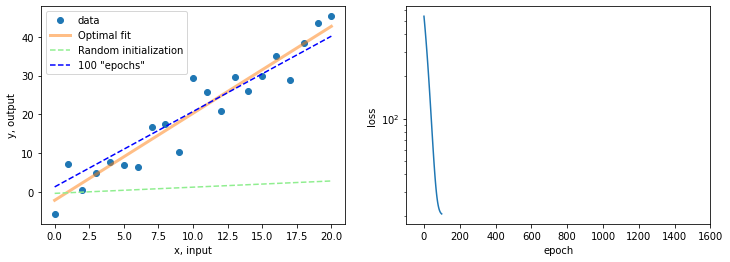

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.plot(x,y,'o',label='data');

ax.plot(_x,linear_model(_x,a,b),linewidth=3,alpha=0.5,label='Optimal fit')
ax.plot(_x,random_init,color='lightgreen',linestyle='dashed',label='Random initialization')
ax.plot(_x,epochs_100,color='b',linestyle='dashed',label='100 \"epochs\"')
ax.legend(prop={'size': 10})
ax.set(xlabel='x, input',ylabel='y, output')

ax = axes[1]
ax.plot(losses)
ax.set(xlabel='epoch',ylabel='loss');
ax.set(xlim=(-100,1600))
ax.set_yscale('log')

In [16]:
train_n_epochs(400,losses)
epochs_500 = model(_X).detach().numpy()

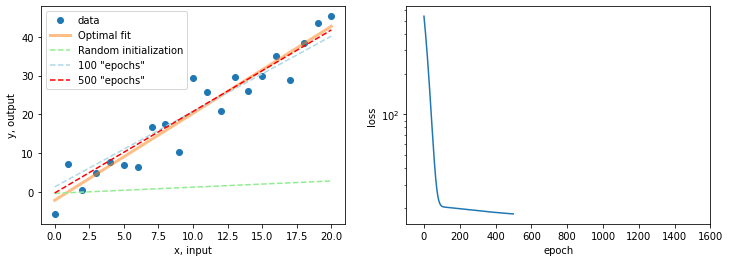

In [17]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.plot(x,y,'o',label='data');

ax.plot(_x,linear_model(_x,a,b),linewidth=3,alpha=0.5,label='Optimal fit')
ax.plot(_x,random_init,color='lightgreen',linestyle='dashed',label='Random initialization')
ax.plot(_x,epochs_100 ,color='lightblue',linestyle='dashed',label='100 \"epochs\"')
ax.plot(_x,epochs_500 ,color='red',linestyle='dashed',label='500 \"epochs\"')
ax.legend(prop={'size': 10})
ax.set(xlabel='x, input',ylabel='y, output')

ax = axes[1]
ax.plot(losses)
ax.set(xlabel='epoch',ylabel='loss');
ax.set(xlim=(-100,1600))
ax.set_yscale('log')

In [18]:
train_n_epochs(1000,losses)
epochs_1500 = model(_X).detach().numpy()

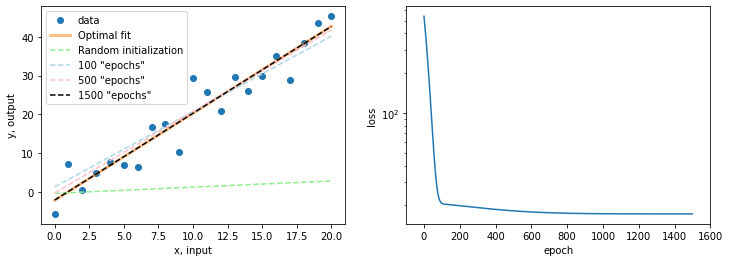

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.plot(x,y,'o',label='data');

ax.plot(_x,linear_model(_x,a,b),linewidth=3,alpha=0.5,label='Optimal fit')
ax.plot(_x,random_init,color='lightgreen',linestyle='dashed',label='Random initialization')
ax.plot(_x,epochs_100 ,color='lightblue',linestyle='dashed',label='100 \"epochs\"')
ax.plot(_x,epochs_500 ,color='pink',linestyle='dashed',label='500 \"epochs\"')
ax.plot(_x,epochs_1500 ,color='black',linestyle='dashed',label='1500 \"epochs\"')
ax.legend(prop={'size': 10})
ax.set(xlabel='x, input',ylabel='y, output')

ax = axes[1]
ax.plot(losses)
ax.set(xlabel='epoch',ylabel='loss');
ax.set(xlim=(-100,1600))
ax.set_yscale('log')

Now generate some "test" data and see the performance
-------

In [20]:
x = np.linspace(0,20,21)
y_test = 2*x + np.random.default_rng(12347).normal(0,4,len(x))

(a,b), _ = curve_fit(linear_model, x, y_test)
print('Optimal parameters: a={:.2f}, b={:.2f}'.format(a,b))

Optimal parameters: a=2.00, b=-0.39


18.939772


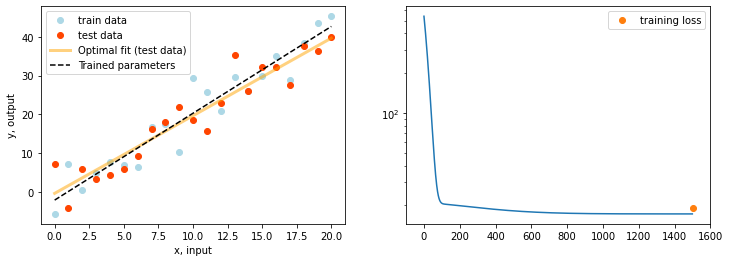

In [21]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.plot(x,y,'o',color='lightblue',label='train data');
ax.plot(x,y_test,'o',color='orangered',label='test data');
ax.plot(_x,linear_model(_x,a,b),linewidth=3,color='orange',alpha=0.5,label='Optimal fit (test data)')
ax.plot(_x,epochs_1500 ,color='black',linestyle='dashed',label='Trained parameters')
ax.legend(prop={'size': 10})
ax.set(xlabel='x, input',ylabel='y, output')

ax = axes[1]
ax.plot(losses)
Y_test = torch.tensor(y_test.reshape(21,1)).float()
loss_test = loss_function(model(X), Y_test).detach().numpy()
print(loss_test)
ax.plot([1500],[loss_test],'o',label='training loss')
ax.legend()
#ax.set(xlabel='epoch',ylabel='loss');
ax.set(xlim=(-100,1600))
ax.set_yscale('log')

In [22]:
a_nn = model.linear.weight.tolist()[0][0]
b_nn = model.linear.bias.tolist()[0]

print('Network a (trained):',a_nn)
print('Network b (trained):',b_nn)

Network a (trained): 2.2396514415740967
Network b (trained): -2.1274337768554688


[Text(0.5, 0, 'x, input'), Text(0, 0.5, 'y, output')]

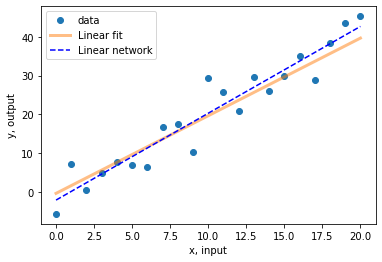

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,y,'o',label='data');

ax.plot(_x,linear_model(_x,a,b),linewidth=3,alpha=0.5,label='Linear fit')
ax.plot(_x,model(_X).detach().numpy(),color='b',linestyle='dashed',label='Linear network')
ax.legend()
ax.set(xlabel='x, input',ylabel='y, output')

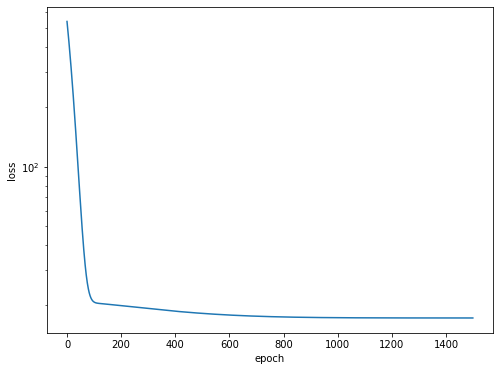

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(losses)
ax.set(xlabel='epoch',ylabel='loss');
ax.set_yscale('log')